In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import Evaluation

In [160]:
def eval(df,true_target):
    N = df.shape[0]
    M = df.shape[1]
    
    loss = 0 
    for i in range(N):
        max_val = df.iloc[i,:].max()
        class_max_val = np.argmax(df.iloc[i,:])+1
        for j in df.iloc[i,:]:
            if j == df.iloc[i,:].max() and class_max_val == true_target[i]:
                Yij = 1
            else:
                Yij = 0
            
            x = Yij*np.log(j)
            loss += x
    
    return(-loss/N)

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Exploratory Data Analysis

In [3]:
data.shape

(61878, 95)

In [4]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [5]:
sum(data.isnull().values) # Each column has 0 null values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

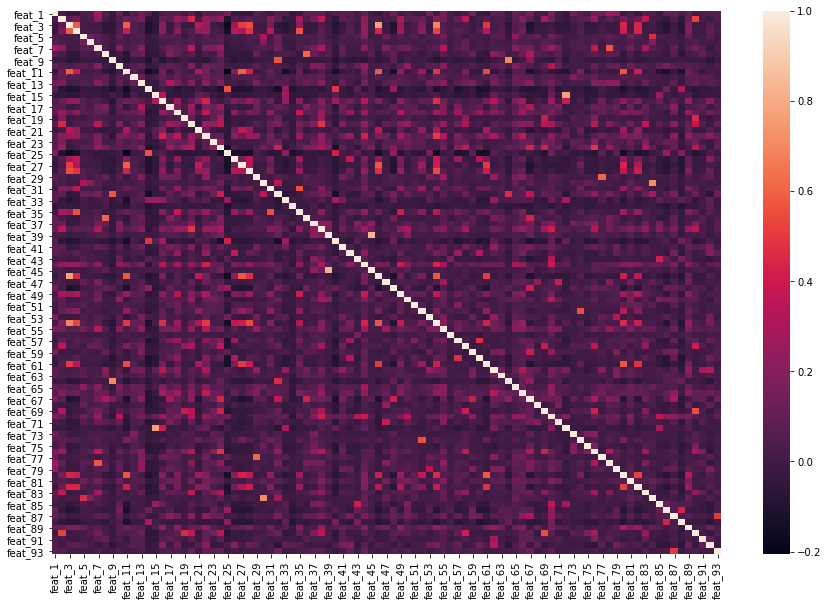

In [6]:
# There are some correlated features
features = data.iloc[:,1:94]
plt.figure(figsize = (15,10))
sns.heatmap(features.corr());

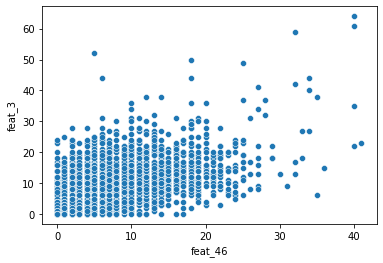

In [7]:
sns.scatterplot(x='feat_46',y='feat_3',data=features);

In [8]:
# No duplicate product/case
sum(data.duplicated())

0

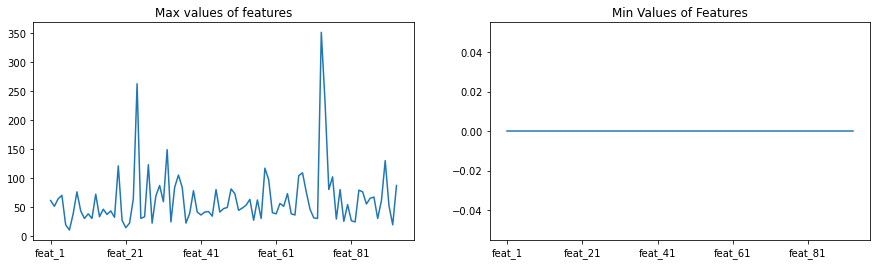

In [9]:
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(1,2,1)
features.max().plot()
plt.title('Max values of features')

ax2 = fig.add_subplot(1,2,2)
features.min().plot()
plt.title('Min Values of Features');

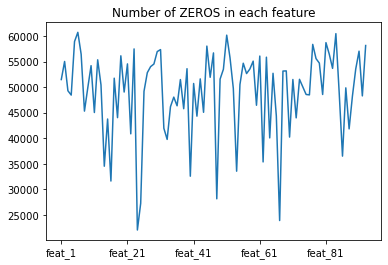

In [10]:
(features==0).sum().plot()
#plt.xticks(ticks = range(1,94), labels = (features==0).sum().index,rotation = 90)
plt.title('Number of ZEROS in each feature');

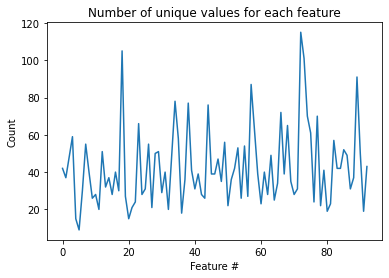

In [11]:
unique_feat_vals = []
for i in range(1,94):
    unique_feat_vals.append(len(features[f'feat_{i}'].value_counts()))

plt.plot(unique_feat_vals)
plt.xlabel('Feature #'); plt.ylabel('Count')
plt.title('Number of unique values for each feature');

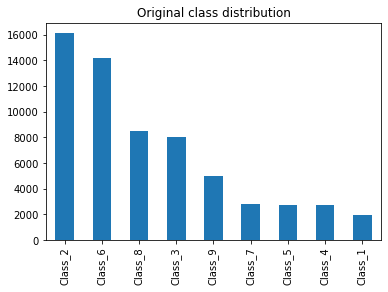

In [46]:
# Definite class imbalance
data['target'].value_counts().plot.bar()
plt.title('Original class distribution');

## Normalization of Features (center and rescale)

In [13]:
normalized_features = (features-features.mean())/features.std()
X = normalized_features

## PCA

In [ ]:
pca = PCA(n_components = None).fit(X)

In [ ]:
#pca.components_

In [ ]:
# Eigenvalues
plt.plot(pca.explained_variance_);
plt.title('Eigenvalues vs PC');
plt.ylabel('eigenvalue');
plt.xlabel('PCA eigenvector');

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum()*100);
plt.title('Percentage of Variance Explained');
plt.ylabel('PVE %')
plt.xlabel('PCA Eigenvector');
print('First 3 PVE:',(pca.explained_variance_ratio_.cumsum()*100)[:3])

In [ ]:
new_features = np.matmul(pca.components_,normalized_features.T).T

## First 3 PCA Visualization

In [ ]:
colors = {'Class_1':'cyan', 'Class_2':'blue', 'Class_3':'green', 'Class_4':'black',
         'Class_5': 'yellow', 'Class_6':'orange', 'Class_7': 'purple', 'Class_8': 'red',
         'Class_9': 'silver'}

In [ ]:
%matplotlib notebook

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=new_features['feat_1'],
           ys=new_features['feat_2'],
           zs=new_features['feat_3'], c = data['target'].apply(lambda x: colors[x]));
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
model = RandomForestClassifier(oob_score = True, n_estimators = 200)

In [163]:
model.fit(normalized_features,data['target'])

RandomForestClassifier(n_estimators=200, oob_score=True)

## OOB Prediction Analysis

In [164]:
model.oob_score_

0.8118879084650441

In [165]:
oob_pred_df = pd.DataFrame(model.oob_decision_function_)
oob_pred_df.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.041667,0.013889,0.027778,0.000000,0.083333,0.055556,0.055556,0.680556,0.041667
2,0.444444,0.049383,0.000000,0.000000,0.037037,0.037037,0.098765,0.074074,0.259259
3,0.376812,0.028986,0.014493,0.014493,0.014493,0.217391,0.173913,0.144928,0.014493
4,0.320000,0.080000,0.000000,0.040000,0.013333,0.106667,0.226667,0.133333,0.080000


In [166]:
oob_class_pred = np.argmax(model.oob_decision_function_,axis=1)+1

In [167]:
true_int = [] 
for i in data['target']:
    i = int(i[-1])
    true_int.append(i)

[[43.6  3.7  0.6  0.1  0.3  8.8  2.7 19.6 20.6]
 [ 0.  88.5  9.9  0.5  0.1  0.2  0.5  0.2  0.1]
 [ 0.  47.7 49.5  1.   0.   0.2  1.1  0.3  0.1]
 [ 0.  38.7 13.3 43.3  0.6  3.   0.7  0.3  0.1]
 [ 0.1  2.6  0.1  0.  96.8  0.2  0.1  0.1  0. ]
 [ 0.3  0.9  0.1  0.1  0.  94.9  1.   1.7  1. ]
 [ 1.1 13.1  7.4  0.8  0.6  8.2 59.3  8.3  1.2]
 [ 0.6  1.1  0.2  0.   0.1  2.7  0.4 93.6  1.3]
 [ 1.8  2.4  0.   0.   0.1  3.9  0.5  3.7 87.6]]


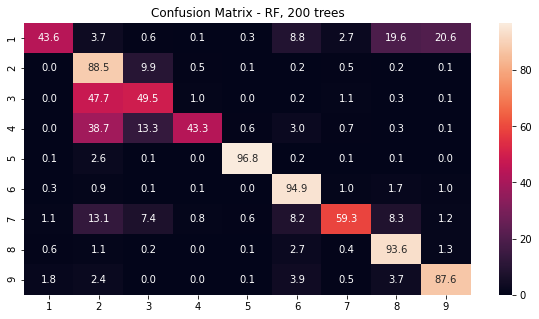

In [170]:
conf = sklearn.metrics.confusion_matrix(true_int, oob_class_pred, normalize = 'true')*100 # Columns are PRED, Rows are TRUE
print(np.round(conf,1))
plt.figure(figsize = (10,5))
sns.heatmap(np.round(conf,1),
           xticklabels = list(range(1,10)),
           yticklabels = list(range(1,10)),
           annot=True, fmt=".1f");
plt.title('Confusion Matrix - RF, 200 trees');

In [211]:
sklearn.metrics.accuracy_score(true_int, oob_pred)

0.80747600116358

## RF Feature Importance

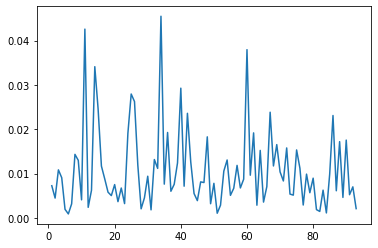

In [27]:
fig = plt.figure()
plt.plot(list(range(1,94)), model.feature_importances_.tolist());

Feature ranking:
1. feature 34 (0.045490)
2. feature 11 (0.042587)
3. feature 60 (0.037951)
4. feature 14 (0.034109)
5. feature 40 (0.029258)
6. feature 25 (0.027940)
7. feature 26 (0.026243)
8. feature 15 (0.024563)
9. feature 67 (0.023831)
10. feature 42 (0.023584)
11. feature 86 (0.023088)
12. feature 36 (0.019260)
13. feature 62 (0.019168)
14. feature 24 (0.019053)
15. feature 48 (0.018273)
16. feature 90 (0.017541)
17. feature 88 (0.017192)
18. feature 69 (0.016523)
19. feature 72 (0.015770)
20. feature 75 (0.015319)
21. feature 64 (0.015210)
22. feature 8 (0.014322)
23. feature 32 (0.013153)
24. feature 54 (0.013051)
25. feature 9 (0.012975)
26. feature 43 (0.012622)
27. feature 39 (0.012382)
28. feature 27 (0.011925)
29. feature 57 (0.011834)
30. feature 68 (0.011706)
31. feature 16 (0.011676)
32. feature 76 (0.011194)
33. feature 33 (0.011156)
34. feature 3 (0.010823)
35. feature 53 (0.010548)
36. feature 70 (0.010371)
37. feature 85 (0.009874)
38. feature 78 (0.009860)
39. fea

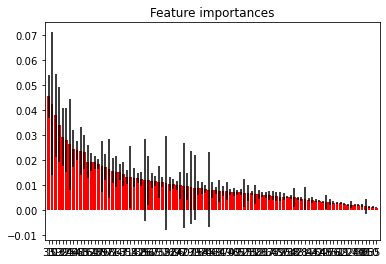

In [38]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [40]:
sklearn.metrics.confusion_matrix(data['target'].to_numpy(), model.predict(normalized_features))

array([[ 1929,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0, 16122,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,  8004,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,  2691,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,  2739,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0, 14135,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,  2839,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,  8464,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,  4955]])

In [41]:
probs = model.predict_proba(normalized_features)

In [42]:
pd.DataFrame(probs)

,0,1,2,3,4,5,6,7,8
0,0.56,0.00,0.00,0.00,0.00,0.43,0.01,0.00,0.00
1,0.65,0.00,0.02,0.00,0.01,0.01,0.02,0.28,0.01
2,0.82,0.02,0.02,0.00,0.00,0.02,0.01,0.01,0.10
3,0.79,0.01,0.02,0.01,0.00,0.06,0.05,0.03,0.03
4,0.76,0.00,0.02,0.00,0.01,0.01,0.11,0.09,0.00
...,...,...,...,...,...,...,...,...,...
61873,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.97
61874,0.02,0.04,0.02,0.02,0.00,0.03,0.01,0.01,0.85
61875,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.98
61876,0.05,0.01,0.00,0.00,0.00,0.10,0.00,0.02,0.82


## Testing Data Evaluation

In [171]:
testing_data = pd.read_csv("test.csv")

In [172]:
test_features = testing_data.iloc[:,1:94]

In [173]:
test_normalized_features = (test_features-test_features.mean())/test_features.std()

In [174]:
probs_test = model.predict_proba(test_normalized_features)

In [175]:
probs_test_df = pd.DataFrame(probs_test)

In [176]:
probs_test_df.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
probs_test_df.insert(0,"id", testing_data['id'])

In [177]:
probs_test_df.to_csv('RF200_predictions.csv', header = True, index= False)

In [ ]:
probs_test_df

In [208]:
boxplot_df = probs_test_df.iloc[:,1:]
boxplot_df = pd.DataFrame(boxplot_df.unstack().reset_index())
boxplot_df.columns = ['class','ignore','probability']

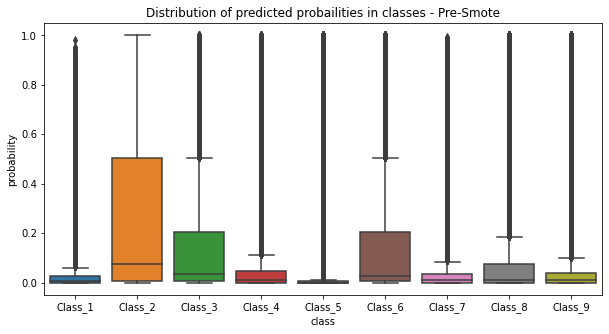

In [212]:
plt.figure(figsize = (10,5))
sns.boxplot(x='class',y='probability',data=boxplot_df)
plt.title('Distribution of predicted probailities in classes - Pre-Smote');

#### Got around 0.56 in Logloss w trees=200

## SMOTE

In [65]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
print(imblearn.__version__)

0.7.0


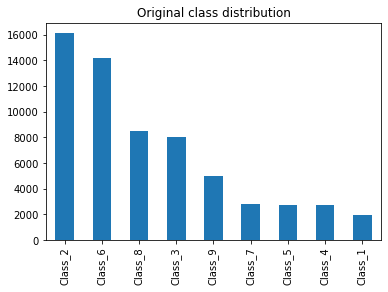

In [49]:
data['target'].value_counts().plot.bar()
plt.title('Original class distribution');

In [77]:
# Oversampling
strategy = {'Class_1':6300, 'Class_4':7000, 'Class_5':7000, 'Class_7':7000, 'Class_9':8100}

oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(normalized_features, data['target'])

strategy_UnderSamp = {'Class_2':9000, 'Class_6':8400}

undersample = RandomUnderSampler(sampling_strategy=strategy_UnderSamp)
X, y = undersample.fit_resample(X, y)

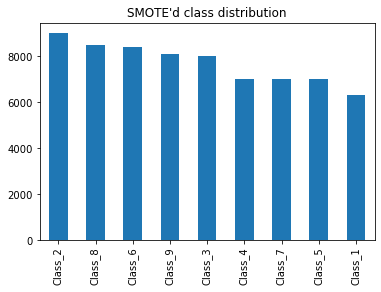

In [216]:
y.value_counts().plot.bar();
plt.title("SMOTE'd class distribution");

### SMOTE'd RF

In [178]:
smote_model = RandomForestClassifier(oob_score = True, n_estimators=200)

In [179]:
smote_model.fit(X,y)

RandomForestClassifier(n_estimators=200, oob_score=True)

## SMOTE'd OOB Prediction Analysis

In [180]:
smote_model.oob_score_ # Increase by ~6%

0.8716867817751343

In [181]:
smote_oob_pred_df = pd.DataFrame(smote_model.oob_decision_function_)
smote_oob_pred_df.head()

,0,1,2,3,4,5,6,7,8
0,0.093333,0.000000,0.000000,0.013333,0.000000,0.813333,0.040000,0.000000,0.040000
1,0.276923,0.000000,0.015385,0.015385,0.076923,0.092308,0.030769,0.461538,0.030769
2,0.800000,0.000000,0.000000,0.000000,0.000000,0.015385,0.030769,0.000000,0.153846
3,0.666667,0.026667,0.040000,0.013333,0.013333,0.066667,0.106667,0.040000,0.026667
4,0.358974,0.012821,0.000000,0.012821,0.012821,0.089744,0.256410,0.205128,0.051282


In [182]:
smote_oob_class_pred = np.argmax(smote_model.oob_decision_function_,axis=1)+1

In [183]:
smote_true_int = [] 
for i in y:
    i = int(i[-1])
    smote_true_int.append(i)

[[89.3  0.5  0.2  0.3  0.1  1.2  0.9  3.1  4.4]
 [ 0.1 74.5 21.4  2.1  0.2  0.1  1.   0.3  0.3]
 [ 0.1 25.6 69.   2.8  0.   0.1  1.9  0.3  0.2]
 [ 0.1  5.4  5.6 87.2  0.3  0.6  0.6  0.1  0.1]
 [ 0.   0.5  0.1  0.  99.2  0.1  0.1  0.   0. ]
 [ 0.9  0.5  0.3  0.4  0.  92.4  1.9  2.   1.6]
 [ 1.1  1.5  2.9  1.2  0.2  1.3 89.6  2.   0.3]
 [ 1.5  0.5  0.6  0.   0.   1.7  0.7 93.3  1.5]
 [ 2.3  0.6  0.1  0.1  0.1  1.2  0.4  1.9 93.2]]


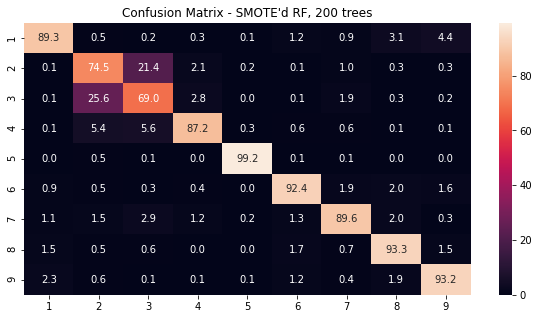

In [184]:
smote_conf = sklearn.metrics.confusion_matrix(smote_true_int, smote_oob_class_pred, normalize = 'true')*100
print(np.round(smote_conf,1))
plt.figure(figsize = (10,5))
sns.heatmap(np.round(smote_conf,1),
           xticklabels = list(range(1,10)),
           yticklabels = list(range(1,10)),
           annot=True, fmt=".1f");
plt.title("Confusion Matrix - SMOTE'd RF, 200 trees");

In [185]:
sklearn.metrics.accuracy_score(smote_true_int, smote_oob_class_pred)

0.8716867817751343

## SMOTE'd Feature Importance

Feature ranking:
1. feature 34 (0.079276)
2. feature 25 (0.029619)
3. feature 67 (0.029437)
4. feature 40 (0.027243)
5. feature 14 (0.027115)
6. feature 60 (0.025297)
7. feature 86 (0.025243)
8. feature 11 (0.024770)
9. feature 62 (0.023828)
10. feature 36 (0.021802)
11. feature 15 (0.021555)
12. feature 90 (0.021483)
13. feature 24 (0.019560)
14. feature 39 (0.019525)
15. feature 26 (0.019466)
16. feature 48 (0.018569)
17. feature 88 (0.017166)
18. feature 75 (0.016677)
19. feature 8 (0.016445)
20. feature 42 (0.016261)
21. feature 17 (0.016002)
22. feature 43 (0.014664)
23. feature 32 (0.014375)
24. feature 64 (0.014312)
25. feature 50 (0.014212)
26. feature 72 (0.013091)
27. feature 9 (0.012990)
28. feature 69 (0.011812)
29. feature 16 (0.011499)
30. feature 53 (0.011170)
31. feature 76 (0.010828)
32. feature 33 (0.010818)
33. feature 68 (0.010755)
34. feature 59 (0.010478)
35. feature 85 (0.010433)
36. feature 54 (0.009904)
37. feature 70 (0.009834)
38. feature 3 (0.009648)
39. fea

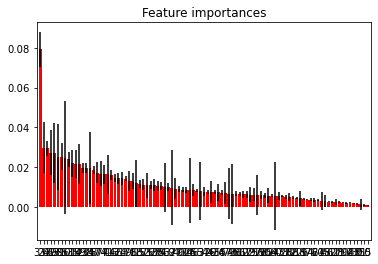

In [97]:
importances = smote_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Testing Data Evaluation

In [186]:
smote_probs_test = smote_model.predict_proba(test_normalized_features)

In [187]:
smote_probs_test_df = pd.DataFrame(smote_probs_test)

In [188]:
smote_probs_test_df.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
smote_probs_test_df.insert(0,"id", testing_data['id'])

In [189]:
smote_probs_test_df

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.045,0.100,0.130,0.605,0.005,0.010,0.085,0.010,0.010
1,2,0.050,0.015,0.030,0.025,0.015,0.470,0.040,0.310,0.045
2,3,0.020,0.005,0.005,0.005,0.000,0.880,0.015,0.055,0.015
3,4,0.025,0.285,0.310,0.265,0.000,0.010,0.015,0.015,0.075
4,5,0.265,0.005,0.000,0.005,0.000,0.025,0.020,0.165,0.515
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.365,0.035,0.030,0.045,0.015,0.110,0.145,0.060,0.195
144364,144365,0.015,0.045,0.230,0.545,0.010,0.000,0.145,0.010,0.000
144365,144366,0.020,0.085,0.130,0.615,0.005,0.010,0.100,0.015,0.020
144366,144367,0.015,0.160,0.045,0.700,0.015,0.010,0.040,0.005,0.010


In [214]:
boxplot_df = smote_probs_test_df.iloc[:,1:]
boxplot_df = pd.DataFrame(boxplot_df.unstack().reset_index())
boxplot_df.columns = ['class','ignore','probability']

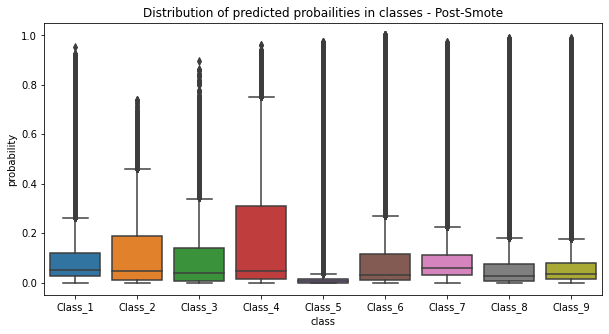

In [215]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='probability',data=boxplot_df)
plt.title('Distribution of predicted probailities in classes - Post-Smote');

In [190]:
smote_probs_test_df.to_csv('RF200smote_predictions.csv', header = True, index = False)